<img src="img/imdb.png">

Kullanılan Keras modülleri
- imdb dataset: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb
- pad_sequences: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
- Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Embedding: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
- SimpleRNN: https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
- Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
- Activation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences # for fixed word size.
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

# 1-Read Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(  path = "ibdb.npz", 
                                                        num_words = None, # 10000 most used words. None=all words
                                                        skip_top = 0, #ignore most used 0 word
                                                        maxlen = None,# Maximum sequence length. crops reviews lenght.
                                                        seed = 113, #Seed for reproducible data shuffling.  
                                                        start_char = 1, #padding character.
                                                        oov_char = 2, # The out-of-vocabulary character
                                                        index_from = 3)

In [3]:
print("Type: ", type(X_train))
print("Type: ", type(X_test))
print("Type: ", type(Y_train))
print("Type: ", type(Y_test))

print("X train shape: ",X_train.shape)
print("X test shape : ",X_test.shape)
print("Y train shape: ",Y_train.shape)
print("Y test shape : ",Y_test.shape)

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
X train shape:  (25000,)
X test shape :  (25000,)
Y train shape:  (25000,)
Y test shape :  (25000,)


# 2-EDA

In [4]:
print("Y train values: ", np.unique(Y_train)) # There 2 target class values: 0 and 1
print("Y test values: ", np.unique(Y_test))

unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ", dict(zip(unique, counts))) # 100% balanced dataset

unique, counts = np.unique(Y_test, return_counts = True)
print("Y testdistribution: ", dict(zip(unique, counts))) # 100% balanced dataset

Y train values:  [0 1]
Y test values:  [0 1]
Y train distribution:  {0: 12500, 1: 12500}
Y testdistribution:  {0: 12500, 1: 12500}


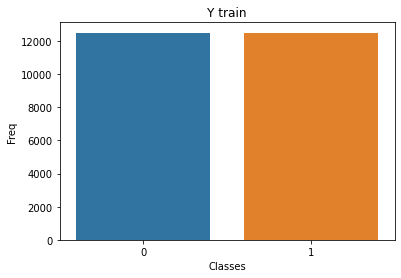

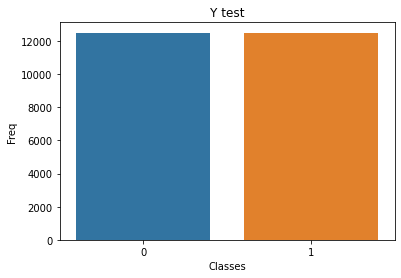

In [5]:
plt.figure()
sns.countplot(x=Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

plt.figure()
sns.countplot(x=Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")
plt.show()

In [6]:
d = X_train[0]
print(d)
print("\nWord length in first review:", len(d))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

Word length in first review: 218


In [7]:
%matplotlib qt5
len_review_train = []
len_review_test = []
for i, j in zip(X_train, X_test):
    len_review_train.append(len(i))
    len_review_test.append(len(j))

sns.distplot(len_review_train, hist_kws = {"alpha":0.3})
sns.distplot(len_review_test, hist_kws = {"alpha":0.3})
plt.show()

C:\Users\Pointo2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pointo2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [8]:
print("Train mean:", np.mean(len_review_train))
print("Train median:", np.median(len_review_train))
print("Train mode:", stats.mode(len_review_train)) # en yukarı uç değer=> bu değer 132 civarında, kelime sayısını 132'ye fixleyeceğiz.
print("\nTest mean:", np.mean(len_review_test))
print("Test median:", np.median(len_review_test))
print("Test mode:", stats.mode(len_review_test))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))

Test mean: 230.8042
Test median: 174.0
Test mode: ModeResult(mode=array([125]), count=array([184]))


In [9]:
# number of words
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


In [10]:
for keys, values in word_index.items():
    if values == 22: # most used 22th word
        print(keys)

you


In [11]:
def whatItSay(index = 24):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

In [12]:
decoded_review = whatItSay(36)

! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


# 3-Preprocess

In [13]:
num_words = 15000 # limited the number of words
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)
maxlen = 130 # max review word length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

### NOTE
- aşağıda 5. reviewde kullanıcı 42 kelimeden oluşan bir review yazmış. 
- Matristeki 1 the'ya karşılık gelir, bu 1'in öncesine, word length'ini 130a tamamlamak için, **pad_sequence** 0'lar ekler! :)

In [14]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [15]:
for i in X_train[0:10]:
    print(len(i)) # All reviews consist of 130 words. 

130
130
130
130
130
130
130
130
130
130


In [16]:
decoded_review = whatItSay(5) # ! = unknown word (it starts "0")

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


# 4-Create RNN Model

In [17]:
rnn = Sequential()

In [18]:
# integerları belirli oranda yoğunluk vektörlerine çevirir
rnn.add(Embedding(input_dim = num_words, output_dim = 32, input_length = maxlen))
# input_shape = total 15000 words and 130 words in a review
rnn.add(SimpleRNN(units = 16, input_shape = (num_words, maxlen), return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid")) # for binary classification

In [19]:
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


# 5-Compile, Train and Test Model

In [20]:
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["accuracy"])

In [21]:
history = rnn.fit(  X_train, 
                    Y_train, 
                    validation_data = (X_test, Y_test), 
                    epochs = 10, 
                    batch_size = 128, 
                    verbose=1)

Epoch 1/10
196/196 [==============================] - 10s 42ms/step - loss: 0.6177 - accuracy: 0.6670 - val_loss: 0.5236 - val_accuracy: 0.8157
Epoch 2/10
196/196 [==============================] - 14s 69ms/step - loss: 0.4085 - accuracy: 0.8375 - val_loss: 0.3666 - val_accuracy: 0.8437
Epoch 3/10
196/196 [==============================] - 18s 92ms/step - loss: 0.3040 - accuracy: 0.8752 - val_loss: 0.4715 - val_accuracy: 0.8172
Epoch 4/10
196/196 [==============================] - 18s 91ms/step - loss: 0.2603 - accuracy: 0.8958 - val_loss: 0.4204 - val_accuracy: 0.8150
Epoch 5/10
196/196 [==============================] - 18s 92ms/step - loss: 0.2224 - accuracy: 0.9128 - val_loss: 0.3609 - val_accuracy: 0.8408
Epoch 6/10
196/196 [==============================] - 17s 89ms/step - loss: 0.1955 - accuracy: 0.9256 - val_loss: 0.3971 - val_accuracy: 0.8326
Epoch 7/10
196/196 [==============================] - 15s 75ms/step - loss: 0.1739 - accuracy: 0.9348 - val_loss: 0.3852 - val_accuracy:

# 6-Evauluate Data

In [22]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[0]*100) # örnek olarak ilk score'u yazdırdık.

782/782 [==============================] - 11s 13ms/step - loss: 0.5161 - accuracy: 0.8404
Accuracy: % 51.61392688751221


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
# aşağıdaki plotta en iyi %84te elde edilmiş
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend() # yukarıda label yazılmazsa hata verir.
plt.show() 

In [25]:
# aşağıdaki plota göre train loss sürekli azalıyor overfitting e doğru gidiyor.
# ama test loss bir yere kadar azalıyor, sonra artıyor.
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()